Here I make a version of main figure 2G, where the sequences which are common to both structured and control libraries are filtered out. The objective is to see if we can support this stentence in the manuscript: 

*“This difference was even more pronounced when the 128 sequences common to both libraries were removed from the analysis (Supplementary Figure x). For example, x of the nonoverlapping sequences in the secondary structure library had a CPM value of 10 or more, while only y did in the randomly mutagenized control library. This indicates that virtually all of the active variants in the control library are sequences that are by chance consistent with the sequence requirements of Aurora rather than new variants of Aurora or distinct catalytic motifs.”*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [4]:
df_strc = pd.read_csv('../../datasets/datasets_prepped/strc_km.csv', index_col=0)
df_ctrl = pd.read_csv('../../datasets/datasets_prepped/ctrl_km.csv', index_col=0)

In [8]:
overlap_sequences = []
with open('../../responses_to_reviewers/ref1_comment_4/library_overlap_seqs.txt', mode='r')as f:
    for l in f:
        overlap_sequences.append(l.strip())

In [17]:
df_strc = df_strc[~df_strc['seq'].isin(overlap_sequences)]
df_ctrl = df_ctrl[~df_ctrl['seq'].isin(overlap_sequences)]

In [18]:
thresholds = [10**x for x in [-1, 0, 1, 2]]

In [19]:
df_res = []

In [20]:
for t in thresholds:
    strc_count = len(df_strc[df_strc['cpm'] >= t])
    ctrl_count = len(df_ctrl[df_ctrl['cpm'] >= t])
    df_res.append([strc_count, ctrl_count])

In [21]:
df_res = pd.DataFrame(df_res, columns=['structured', 'random'], index=thresholds)

In [22]:
df_res

,structured,random
0.1,1910565,2039489
1.0,50478,141897
10.0,6538,80
100.0,229,0


In [23]:
df_res.to_csv('number_of_seqs_above_cutoff_strc_vs_ctrl_filtered.csv')

In [24]:
xticklabels = ['0.1', '1', '10', '100']
x = np.array([x for x in range(0, len(df_res))])

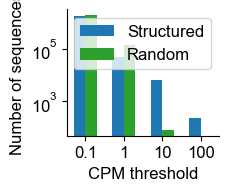

In [26]:
width=0.3

fig, ax = plt.subplots()
g1 = ax.bar(x - width/2, df_res['structured'], width, label='Structured', color='tab:blue')
g2 = ax.bar(x + width/2, df_res['random'], width, label='Random', color='tab:green')
plt.xticks(x, xticklabels)
plt.yscale('log')
set_size(1.9, 1.6)
plt.xlabel('CPM threshold')
plt.ylabel('Number of sequences')
plt.legend()
plt.tight_layout()
sns.despine()
plt.savefig('number_of_sequences_above_cutoff_strc_vs_ctrl_filtered.svg')